## Librerias

In [2]:
try:
    import pandas as pd
except ImportError:
    print("Pandas not installed")
    %pip install pandas --user

try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Matplotlib not installed")
    %pip install matplotlib --user

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos

- [Dataset Qatar 2022: https://www.kaggle.com/datasets/shrikrishnaparab/fifa-world-cup-2022-qatar-match-data](https://www.kaggle.com/datasets/shrikrishnaparab/fifa-world-cup-2022-qatar-match-data)

In [4]:
archivo = "https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2025/refs/heads/main/qatar.csv"

# Leer datos del archivo
mundial : pd.DataFrame = pd.read_csv(archivo)
mundial

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
0,1,Sun,20-Nov-22,17:00,Al Bayt Stadium,Daniele Orsato,Group A,QATAR,ECUADOR,67372,...,0,1,6,5,0,0,52,72,256,279
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,0,1,8,13,0,0,63,72,139,416
2,3,Mon,21-Nov-22,17:00,Al Thumama Stadium,Wilton Sampaio,Group A,SENEGAL,NETHERLANDS,41721,...,0,0,9,15,0,0,63,73,263,251
3,4,Mon,21-Nov-22,20:00,Ahmed bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Group B,UNITED STATES,WALES,43418,...,0,1,7,7,0,0,81,72,242,292
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1,0,9,15,0,0,49,54,193,308
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,0,13,14,0,0,72,47,328,218
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,0,0,7,14,0,0,75,72,288,277


In [5]:
# Cuantos partidos se jugaron?
# Completar
cantidad_partidos = len(mundial) #Devuelve el numero de filas de DataFrame (Nro Paridos en archivo).
                                     #len devuleve el numero de filas
print (f"se Jugaron {cantidad_partidos}  partidos")

se Jugaron 64  partidos


In [6]:
# Que datos tiene el dataset? (Pista: usar .info(), .describe(), .columns, .head())
# Checkear columnas
# Completar

mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   match_no                         64 non-null     int64  
 1   day_of_week                      64 non-null     object 
 2   date                             64 non-null     object 
 3   hour                             64 non-null     object 
 4   venue                            64 non-null     object 
 5   referee                          64 non-null     object 
 6   group                            64 non-null     object 
 7   1                                64 non-null     object 
 8   2                                64 non-null     object 
 9   attendance                       64 non-null     int64  
 10  1_xg                             64 non-null     float64
 11  2_xg                             64 non-null     float64
 12  1_poss                  

## Analisis

### Primera Parte

In [12]:
# Cuantas selecciones participaron?
# Completar
pd.concat([
    mundial["1"],
    mundial["2"]]).nunique()

32

In [9]:
# Cuantas fases tiene el mundial?
# Completar
mundial["group"].unique()
#mundial["is_group_phase"] = mundial["group"].apply(lambda x: "Group" in x) #lambda es una funcion que no ocupa memoria
def isGroup (phase_name):
    return "Group" in phase_name
mundial["is_group_phase"] = mundial["group"].apply(isGroup)
mundial["group"][~mundial["is_group_phase"]].nunique() + 1

6

In [11]:
# Cual fue la "attendance" promedio por partido?
# Completar
mundial["attendance"].mean() # mean es promedio

np.float64(53191.4375)

In [22]:
# Cual fue el partido con mas diferencia de goles?
# Completar


# Crear la columna 'goal_difference' calculando la diferencia absoluta de goles
mundial["goal_difference"] = abs(mundial["1_goals"] - mundial["2_goals"])

# Encontrar el partido con la mayor diferencia de goles
partido_max_diferencia = mundial[mundial["goal_difference"] == mundial["goal_difference"].max()]["match_no"].values[0]

# Mostrar el resultado
print(partido_max_diferencia)


11


In [ ]:
# Cual es la selección que más penales metió?
# Completar

# Crear un DataFrame con las selecciones y los penales anotados
penales = pd.concat([
    mundial[["1", "1_panelties_scored"]].rename(columns={"1": "seleccion", "1_panelties_scored": "penales_anotados"}),
    mundial[["2", "2_panelties_scored"]].rename(columns={"2": "seleccion", "2_panelties_scored": "penales_anotados"})
])

# Agrupar por selección y sumar los penales anotados
penales_totales = penales.groupby("seleccion")["penales_anotados"].sum()

# Encontrar la selección que más penales anotó
seleccion_max_penales = penales_totales.idxmax()  #idxmax devuelve el indice del maximo valor.
penales_maximos = penales_totales.max()  # Cantidad máxima de penales

# Mostrar el resultado
print(f"La selección que más penales metió es {seleccion_max_penales} con {penales_maximos} penales.")

La selección que más penales metió es ARGENTINA con 4 penales.


In [29]:
# Cual es la selección que mas penales le hicieron?
# Completar

# Crear un DataFrame con las selecciones y los penales recibidos
penales_recibidos = pd.concat([
    mundial[["2", "1_panelties_scored"]].rename(columns={"2": "seleccion", "1_panelties_scored": "penales_recibidos"}),
    mundial[["1", "2_panelties_scored"]].rename(columns={"1": "seleccion", "2_panelties_scored": "penales_recibidos"})
])

# Agrupar por selección y sumar los penales recibidos
penales_recibidos_totales = penales_recibidos.groupby("seleccion")["penales_recibidos"].sum()

# Encontrar la selección que más penales recibió
seleccion_max_penales_recibidos = penales_recibidos_totales.idxmax()  # Selección con más penales recibidos
penales_maximos_recibidos = penales_recibidos_totales.max()  # Cantidad máxima de penales recibidos

# Mostrar el resultado
print(f"La selección que más penales le hicieron es {seleccion_max_penales_recibidos} con {penales_maximos_recibidos} penales.")

La selección que más penales le hicieron es FRANCE con 3 penales.


### Segunda Parte

In [34]:
equipo : str = "ARGENTINA"

In [35]:
# Seleccionar todos los partidos que jugo el equipo de "local"
# Completar

# Filtrar los partidos donde el equipo jugó como local
filtroLocal: pd.DataFrame = mundial[mundial["1"] == equipo]

# Mostrar los partidos filtrados
print(filtroLocal)

    match_no day_of_week       date   hour                  venue  \
4          5         Tue  22-Nov-22  11:00  Lusail Iconic Stadium   
23        24         Sat  26-Nov-22  20:00  Lusail Iconic Stadium   
49        50         Sat   3-Dec-22  20:00  Ahmed bin Ali Stadium   
60        61         Tue  13-Dec-22  20:00  Lusail Iconic Stadium   
63        64         Sun  18-Dec-22  16:00  Lusail Iconic Stadium   

             referee        group          1             2  attendance  ...  \
4      Slavko Vincic      Group C  ARGENTINA  SAUDI ARABIA       88012  ...   
23    Daniele Orsato      Group C  ARGENTINA        MEXICO       88966  ...   
49  Szymon Marciniak  Round of 16  ARGENTINA     AUSTRALIA       45032  ...   
60    Daniele Orsato   Semi-Final  ARGENTINA       CROATIA       88966  ...   
63  Szymon Marciniak        Final  ARGENTINA        FRANCE       88966  ...   

    1_goal_prevented  2_goal_prevented  1_own_goal  2_own_goal  \
4                  4                14      

In [36]:
# Seleccionar todos los partidos que jugo el equipo de "visitante"
# Completar

# Filtrar los partidos donde el equipo jugó como visitante
filtroVisitante: pd.DataFrame = mundial[mundial["2"] == equipo]

# Mostrar los partidos filtrados
print(filtroVisitante)

    match_no day_of_week       date   hour                  venue  \
38        39         Wed  30-Nov-22  20:00  Lusail Iconic Stadium   
57        58         Fri   9-Dec-22  20:00  Lusail Iconic Stadium   

                referee          group            1          2  attendance  \
38       Michael Oliver        Group C       POLAND  ARGENTINA       84985   
57  Antonio Mateu Lahoz  Quarter-final  NETHERLANDS  ARGENTINA       88235   

    ...  1_goal_prevented  2_goal_prevented  1_own_goal  2_own_goal  \
38  ...                25                 4           0           0   
57  ...                15                 5           0           0   

    1_forced_turnovers  2_forced_turnovers 1_defensive_pressure_applied  \
38                  67                  48                          438   
57                  91                  79                          401   

    2_defensive_pressure_applied  is_group_phase  goal_difference  
38                           141            True 

In [37]:
# Seleccionar todos los partidos que jugo el equipo (de "local" o "visitante")
# Completar

# Filtrar los partidos donde el equipo jugó como local o visitante
partidos: pd.DataFrame = mundial[(mundial["1"] == equipo) | (mundial["2"] == equipo)]

# Mostrar los partidos filtrados
print(partidos)


    match_no day_of_week       date   hour                  venue  \
4          5         Tue  22-Nov-22  11:00  Lusail Iconic Stadium   
23        24         Sat  26-Nov-22  20:00  Lusail Iconic Stadium   
38        39         Wed  30-Nov-22  20:00  Lusail Iconic Stadium   
49        50         Sat   3-Dec-22  20:00  Ahmed bin Ali Stadium   
57        58         Fri   9-Dec-22  20:00  Lusail Iconic Stadium   
60        61         Tue  13-Dec-22  20:00  Lusail Iconic Stadium   
63        64         Sun  18-Dec-22  16:00  Lusail Iconic Stadium   

                referee          group            1             2  attendance  \
4         Slavko Vincic        Group C    ARGENTINA  SAUDI ARABIA       88012   
23       Daniele Orsato        Group C    ARGENTINA        MEXICO       88966   
38       Michael Oliver        Group C       POLAND     ARGENTINA       84985   
49     Szymon Marciniak    Round of 16    ARGENTINA     AUSTRALIA       45032   
57  Antonio Mateu Lahoz  Quarter-final  NE

In [38]:
# Cuantos goles hizo el equipo en total (obtener los goles metidos de local y sumarlos con los goles metidos de visitante)
# Completar

# Goles como local
goles_local = mundial[mundial["1"] == equipo]["1_goals"].sum()

# Goles como visitante
goles_visitante = mundial[mundial["2"] == equipo]["2_goals"].sum()

# Total de goles
goles: int = goles_local + goles_visitante
print(goles)

15


In [39]:
# Cuantos goles hizo el equipo en promedio
# Completar
# Goles como local
goles_local = mundial[mundial["1"] == equipo]["1_goals"].sum()

# Goles como visitante
goles_visitante = mundial[mundial["2"] == equipo]["2_goals"].sum()

# Total de goles
goles: int = goles_local + goles_visitante

#Total partidos jugados
partidos_jugados = len(mundial[(mundial["1"] == equipo) | (mundial["2"] == equipo)])

# Promedio de goles
promedio_goles: float = goles / partidos_jugados if partidos_jugados > 0 else 0

print(promedio_goles)



2.142857142857143


In [43]:
# Cuantos partidos gano el equipo
# Completar

# Verificar los partidos ganados como local
ganados_local = mundial[(mundial["1"] == equipo) & (mundial["1_goals"] > mundial["2_goals"])]

# Verificar los partidos ganados como visitante
ganados_visitante = mundial[(mundial["2"] == equipo) & (mundial["2_goals"] > mundial["1_goals"])]

# Total de partidos ganados
ganados_total = len(ganados_local) + len(ganados_visitante)

print(ganados_total)

4


C:\Users\SABETA\AppData\Local\Temp\ipykernel_6536\1034847112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partidos["goles_hechos"] = partidos.apply(


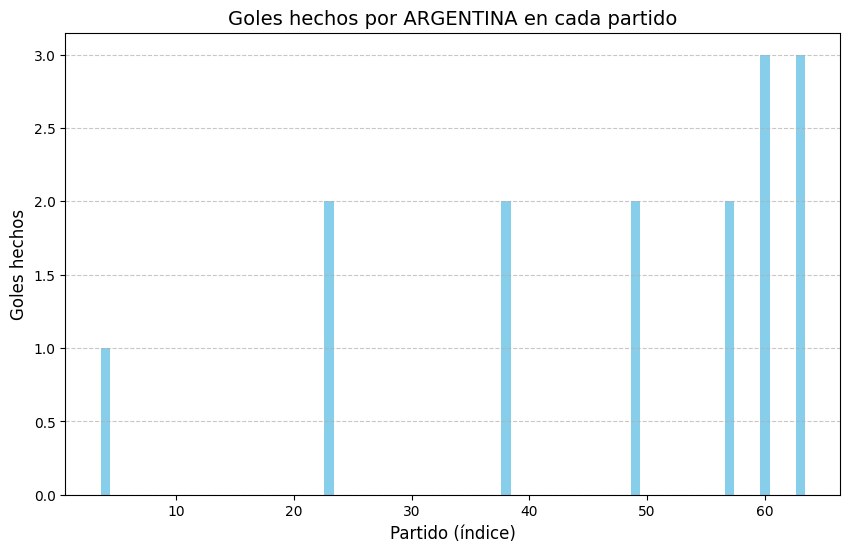

In [42]:
# Graficar los goles hechos por el equipo en cada partido

# Filtrar los partidos donde el equipo jugó como local o visitante
partidos = mundial[(mundial["1"] == equipo) | (mundial["2"] == equipo)]

# Crear una columna con los goles hechos por el equipo en cada partido
partidos["goles_hechos"] = partidos.apply(
    lambda row: row["1_goals"] if row["1"] == equipo else row["2_goals"], axis=1
)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(partidos.index, partidos["goles_hechos"], color="skyblue")

# Configurar el gráfico
ax.set_title(f"Goles hechos por {equipo} en cada partido", fontsize=14)
ax.set_xlabel("Partido (índice)", fontsize=12)
ax.set_ylabel("Goles hechos", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

### Tercera Parte

In [31]:
# Contar cuantos goles hizo cada equipo en total en el mundial
# Completar
(mundial.groupby("1")["1_goals"].sum() + mundial.groupby("2")["2_goals"].sum())

1
ARGENTINA         15
AUSTRALIA          4
BELGIUM            1
BRAZIL             8
CAMEROON           4
CANADA             2
COSTA RICA         3
CROATIA            8
DENMARK            1
ECUADOR            4
ENGLAND           13
FRANCE            16
GERMANY            6
GHANA              5
IRAN               4
JAPAN              5
KOREA REPUBLIC     5
MEXICO             2
MOROCCO            6
NETHERLANDS       10
POLAND             3
PORTUGAL          12
QATAR              1
SAUDI ARABIA       3
SENEGAL            5
SERBIA             5
SPAIN              9
SWITZERLAND        5
TUNISIA            1
UNITED STATES      3
URUGUAY            2
WALES              1
dtype: int64

In [ ]:
# Graficar los goles por equipo en todo el mundial

fig, ax = plt.subplots()
# Completar

In [ ]:
# Cual es el equipo que hizo mas goles en el mundial?
# Completar

In [ ]:
# Por cada partido, cual fue la diferencia de goles?
# Completar

In [ ]:
# Por cada partido, cual fue el equipo que gano?
# Completar

In [ ]:
# En cada fase del mundial, cual fue el equipo que hizo mas goles?
# Completar

### Tercera Parte

In [ ]:
# Armar un gráfico a partir de algun nuevo análisis que se te ocurra
# Completar